# Linear Regression 

## import library

In [239]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

## load point data 

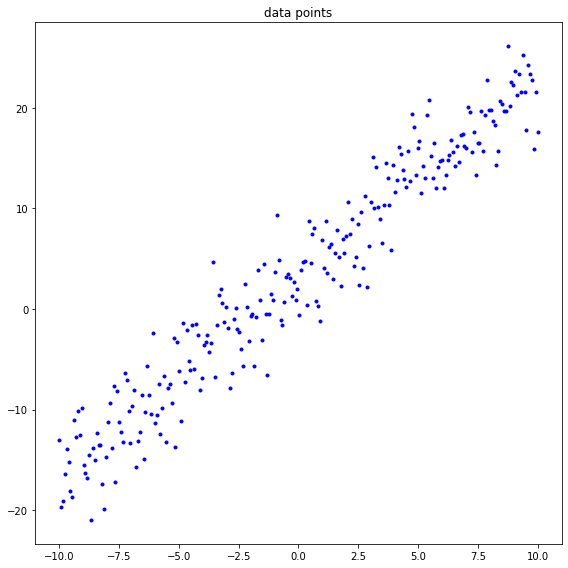

In [240]:
filename    = 'assignment_06_data.csv'
data_load   = np.loadtxt(filename, delimiter = ',')

x   = data_load[0, :]
y   = data_load[1, :]

plt.figure(figsize=(8,8))

plt.plot(x, y, '.', color = 'blue')
plt.title('data points')

plt.tight_layout()
plt.show()

## compute the loss function

In [241]:
def compute_loss(x, y, theta0, theta1):
    
    loss = 0
    for i in range(x.size): 
        loss += (theta0+theta1*x[i]-y[i])**2
        

    loss /= 2*(x.size)



    
    return loss

In [242]:
## compute the gradient for each model parameter

In [243]:
def compute_gradient_theta0(x, y, theta0, theta1):
    dL=0
    n=x.size
    for i in range(n) :
        dL += theta0- y[i] +x[i]
       

    dL = dL*2/n

    
    return dL

In [244]:
def compute_gradient_theta1(x, y, theta0, theta1):
    dL=0
    n=x.size
    for i in range(n) :
        dL += theta0+(theta1*x[i]-y[i])*x[i]

    dL = dL*2/n


    return dL

## gradient descent for each model parameter

In [245]:
num_iteration       = 1000
learning_rate       = 0.01

theta0              = 0
theta1              = 0

theta0_iteration    = np.zeros(num_iteration)
theta1_iteration    = np.zeros(num_iteration)
loss_iteration      = np.zeros(num_iteration)

for i in range(num_iteration):

    theta0  =  theta0 - learning_rate*compute_gradient_theta0(x, y, theta0, theta1)
    theta1  =  theta1 - learning_rate*compute_gradient_theta1(x, y, theta0, theta1)
    loss    =  compute_loss(x, y, theta0, theta1)

    theta0_iteration[i] = theta0
    theta1_iteration[i] = theta1
    loss_iteration[i]   = loss

    print("iteration = %4d, loss = %5.5f ,theta0 =%5.5f,theata1 =%5.5f" %(i, loss,theta0,theta1))

iteration =    0, loss = 16.72368 ,theta0 =0.06463,theata1 =1.33438
iteration =    1, loss = 10.14157 ,theta0 =0.12798,theata1 =1.77094
iteration =    2, loss = 9.25441 ,theta0 =0.19005,theata1 =1.91293
iteration =    3, loss = 8.99149 ,theta0 =0.25089,theata1 =1.95830
iteration =    4, loss = 8.80508 ,theta0 =0.31050,theata1 =1.97199
iteration =    5, loss = 8.63452 ,theta0 =0.36893,theata1 =1.97532
iteration =    6, loss = 8.47227 ,theta0 =0.42618,theata1 =1.97526
iteration =    7, loss = 8.31693 ,theta0 =0.48229,theata1 =1.97412
iteration =    8, loss = 8.16797 ,theta0 =0.53728,theata1 =1.97265
iteration =    9, loss = 8.02507 ,theta0 =0.59117,theata1 =1.97109
iteration =   10, loss = 7.88794 ,theta0 =0.64398,theata1 =1.96952
iteration =   11, loss = 7.75635 ,theta0 =0.69574,theata1 =1.96797
iteration =   12, loss = 7.63007 ,theta0 =0.74646,theata1 =1.96645
iteration =   13, loss = 7.50888 ,theta0 =0.79616,theata1 =1.96495
iteration =   14, loss = 7.39260 ,theta0 =0.84488,theata1 =1

In [246]:
f =  theta0 + theta1*x

## plot the results

In [248]:
def plot_data_regression(x, y, f):

    plt.figure(figsize=(8,6))
    plt.title('linear regression result')

    plt.plot(x, y, '.', color = 'blue')
    plt.plot(x, f, '-', color = 'red')
    plt.tight_layout()
    plt.show()

In [249]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))
    plt.title('loss curve')
    plt.plot( loss_iteration, '-', color = 'red')

    
    plt.tight_layout()
    plt.show()

In [250]:

def plot_model_parameter(theta0_iteration, theta1_iteration):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')
    plt.plot(theta0_iteration ,'-', color = 'blue')
    plt.plot(theta1_iteration ,'-', color = 'green')

    plt.tight_layout()
    plt.show()

In [285]:

grid_theta0  = np.arange(-10, 10, 0.1)
grid_theta1   = np.arange(-10, 10, 0.1)

grid_theta0, grid_theta1 = np.meshgrid(grid_theta0,grid_theta1)

grid_loss   = compute_loss(x, y, grid_theta0,  grid_theta1)



def plot_loss_surface(grid_theta0, grid_theta1, grid_loss): 
    x = grid_theta0

    y = grid_theta1

    z = grid_loss 
    fig = plt.figure(figsize=(8,8))
    plt.title('loss surface')
    
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(x, y, z, cmap="plasma")

    plt.show()
    



# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data in blue point and the regression result in red curve

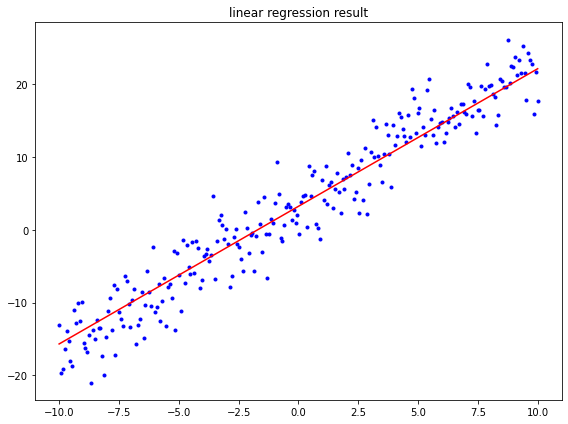

In [252]:
plot_data_regression(x, y, f)

### # 02. plot the values of the model parameters $\theta_0$ in blue curve and $\theta_1$ in green curve over the gradient descent iterations

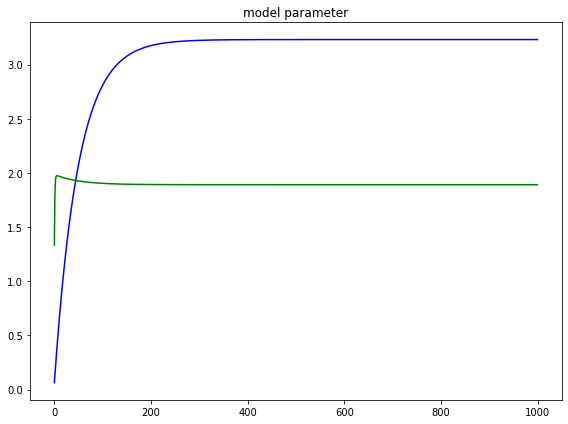

In [253]:
plot_model_parameter(theta0_iteration, theta1_iteration)

### # 03. plot the loss values $\mathcal{L}(\theta)$ in red curve over the gradient descent iterations

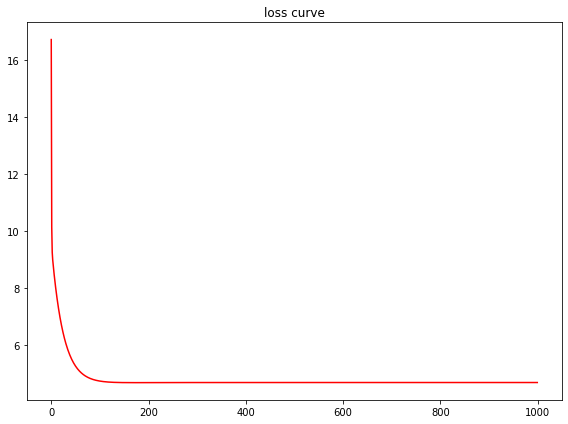

In [254]:
plot_loss_curve(loss_iteration) 

### # 04. plot the loss surface in 3-dimension surface where $x$-axis represents $\theta_0$, $y$-axis represents $\theta_1$ and $z$-axis represents $\mathcal{L}$

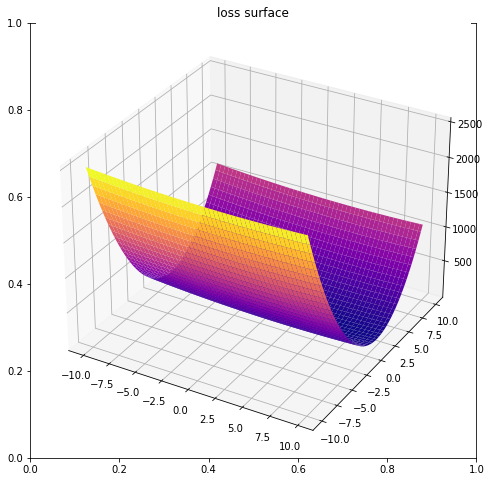

In [284]:
plot_loss_surface(grid_theta0, grid_theta1, grid_loss)